In [2]:
corpus="here goes some text like this"

In [2]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          #stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

NameError: name 'corpus' is not defined

In [5]:
import Image


ModuleNotFoundError: No module named 'Image'

In [4]:
pip install image

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import numpy as np

# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('wp2words.csv')

# Sample the data to speed up computation
# Comment out this line to match with lecture
#df = df.sample(frac=0.1, random_state=10)
print (f"Shape of dataframe is {df.shape}")
df.head()
X=df['text']
#Z=df['Tweet']
Z=df['text']

#print (df['Tweet'])

#print (X)

print (Z)

Shape of dataframe is (1556, 24)
0       I wonder how long James II fans carried on obj...
1       Did you #BackBoris in 2012 for London Mayor @H...
2       When we Leave the EU. That day we stop paying,...
3                                              #BackBoris
4       "We are putting more money into policing and s...
                              ...                        
1551    I'm unemployed and from Barnsley and i support...
1552    You know exactly how a #GeneralElection would ...
1553    Proof, if you ever needed it, that the Brexit ...
1554    There we have different views.\nNot one indivi...
1555    And the 17.4 million are on standby to help hi...
Name: text, Length: 1556, dtype: object


In [42]:
import re  

import spacy

nlp = spacy.load('en_core_web_sm')

processed_tweets=[]

for tweet in range(0, len(X)):  
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

            
    # Remove all the special characters
    
    processed_tweet = re.sub(r'http\S+', ' ', processed_tweet)
    
    #processed_tweet = re.sub(r'https?:\/\/+', ' ', processed_tweet)
    
    #processed_tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',processed_tweet)
    
    processed_tweet=re.sub(r'www\S+', ' ', processed_tweet)
    
    processed_tweet=re.sub(r'co \S+', ' ', processed_tweet)
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', ' ', processed_tweet)
    
    processed_tweet = re.sub(r'\d','',processed_tweet)
    
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    
    processed_tweets.append(processed_tweet)
    
print (processed_tweets)    


 

['i wonder how long james ii fans carried on objecting to the gloriousrevolution they were on the wrong side of history just as remain aka wa is today brexit may be the catalyst for gloriousrevolution either backboris or make way for nigel_farage the brexitparty_ukpic twitter com uvmsmosmj', 'did you backboris in for london mayor hbaldwin ', 'when we leave the eu that day we stop paying gross bn week we will also not have to pay extras for bailing out other eu failed states nor will we have to pay any vat or be taxed further for being more successful than other eu states so not too long eh backboris', ' backboris', ' we are putting more money into policing and spending billion on more police officers to make our streets safer because what matters to me is making sure your neighbourhood is safe place well said borisjohnson backboris pic twitter com vxpxsazas', ' backboris pic twitter com pnjorzix', ' backboris backboris the only way we will get brexit is by backing the candidate who bac

In [43]:
print (processed_tweets)    


['i wonder how long james ii fans carried on objecting to the gloriousrevolution they were on the wrong side of history just as remain aka wa is today brexit may be the catalyst for gloriousrevolution either backboris or make way for nigel_farage the brexitparty_ukpic twitter com uvmsmosmj', 'did you backboris in for london mayor hbaldwin ', 'when we leave the eu that day we stop paying gross bn week we will also not have to pay extras for bailing out other eu failed states nor will we have to pay any vat or be taxed further for being more successful than other eu states so not too long eh backboris', ' backboris', ' we are putting more money into policing and spending billion on more police officers to make our streets safer because what matters to me is making sure your neighbourhood is safe place well said borisjohnson backboris pic twitter com vxpxsazas', ' backboris pic twitter com pnjorzix', ' backboris backboris the only way we will get brexit is by backing the candidate who bac

In [44]:
for i in (processed_tweets):
    print (i)

i wonder how long james ii fans carried on objecting to the gloriousrevolution they were on the wrong side of history just as remain aka wa is today brexit may be the catalyst for gloriousrevolution either backboris or make way for nigel_farage the brexitparty_ukpic twitter com uvmsmosmj
did you backboris in for london mayor hbaldwin 
when we leave the eu that day we stop paying gross bn week we will also not have to pay extras for bailing out other eu failed states nor will we have to pay any vat or be taxed further for being more successful than other eu states so not too long eh backboris
 backboris
 we are putting more money into policing and spending billion on more police officers to make our streets safer because what matters to me is making sure your neighbourhood is safe place well said borisjohnson backboris pic twitter com vxpxsazas
 backboris pic twitter com pnjorzix
 backboris backboris the only way we will get brexit is by backing the candidate who backed it in june 
 bac

In [22]:
import csv

i=0
for entry in processed_tweets:
    i+=1
    with open ('wp2_cleaned.csv','a') as res:        
        writer=csv.writer(res)           
        #writer.writerow({i:"index" , ' '.join(entry):"tweet"})
        s="{},{}\n".format(i,entry)
        res.write(s)
        print (s)
        

1,i wonder how long james ii fans carried on objecting to the gloriousrevolution they were on the wrong side of history just as remain aka wa is today brexit may be the catalyst for gloriousrevolution either backboris or make way for nigel_farage the brexitparty_ukpic twitter com uvmsmosmj

2,did you backboris in for london mayor hbaldwin 

3,when we leave the eu that day we stop paying gross bn week we will also not have to pay extras for bailing out other eu failed states nor will we have to pay any vat or be taxed further for being more successful than other eu states so not too long eh backboris

4, backboris

5, we are putting more money into policing and spending billion on more police officers to make our streets safer because what matters to me is making sure your neighbourhood is safe place well said borisjohnson backboris pic twitter com vxpxsazas

6, backboris pic twitter com pnjorzix

7, backboris backboris the only way we will get brexit is by backing the candidate who bac

UnicodeEncodeError: 'charmap' codec can't encode characters in position 5-30: character maps to <undefined>

In [45]:
df1=pd.read_csv('wp2_cleaned.csv',encoding='latin1')
      
df1.columns=['id','tweet']  
df2=df1['tweet'].to_string(index=False)

df2

'   did you backboris in for london mayor hbaldwin \n when we leave the eu that day we stop paying g...\n                                         backboris\n  we are putting more money into policing and s...\n                backboris pic twitter com pnjorzix\n  backboris backboris the only way we will get ...\n  backboris getbrexitdone twitter com russell s...\n so john ticket labour mp confirms on gmb that ...\n  parliamentvsthepeople standupbrexit get brexi...\n this is what is happening to our wonderful cou...\n oh he will you can count on it backboris boris...\n bang on even the met say at least people who s...\n                                         backboris\n great article on conservatives redemption by j...\n investigation into the labour party in accorda...\n no out going pm should be able to make these d...\n next tuesday we will have prime minister with ...\n spot on from borisjohnson don want no deal out...\n  we re after deal and if we don get one we re ...\n           

In [48]:
df2.to_csv('wp2cor.csv')

AttributeError: 'str' object has no attribute 'to_csv'

In [51]:
with open('wp2corpus2.txt', 'w',encoding='utf-8') as f:
    for item in processed_tweets:
        f.write("%s\n" % item)

In [3]:
sample = open("wp2corpus2.txt", "r",encoding='utf-8') 
s = sample.read() 

# Replaces escape character with space 
f = s.replace("\n", " ") 

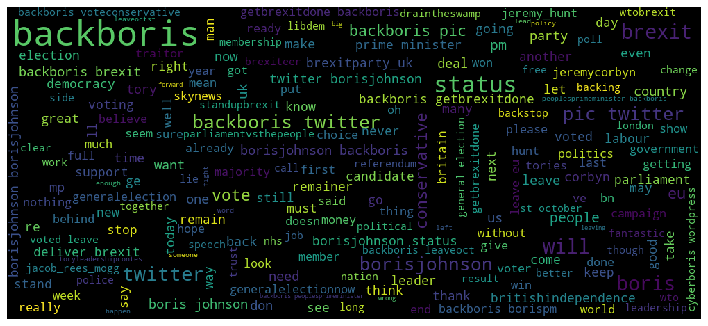

In [18]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(
                          background_color='black',
                          #stopwords=stop_words,
                          max_words=200,
                          max_font_size=50, width=1000, height=450,
                          random_state=42
                         ).generate(f)
print(wordcloud)
plt.figure(figsize = (10, 10), facecolor = None) 
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)

plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=2500)
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


In [19]:
import pandas as pd
import numpy as np

# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('#antibrexit_tweets.csv')

# Sample the data to speed up computation
# Comment out this line to match with lecture
#df = df.sample(frac=0.1, random_state=10)
print (f"Shape of dataframe is {df.shape}")
df.head()
X=df['text']
#Z=df['Tweet']
Z=df['text']

#print (df['Tweet'])

#print (X)

print (Z)

Shape of dataframe is (1827, 17)
0       @Keir_Starmer @EmmaHardyMP @RCorbettMEP @Magic...
1       #bollocksToBrexit #BrexitPartyNotInMyName #bre...
2       SEULGI : #ANTIBREXIT https://twitter.com/redve...
3       So it's clear #sky agenda is now openly \n\n#A...
4       It will be interesting to see which #AntiBrexi...
                              ...                        
1822    Protesters used pots, pans, drums and whistles...
1823    #PeoplesVote ? #antibrexit ?\nCorbyn really re...
1824    en het onderzoek speelt natuurlijk weer op emo...
1825    https://www.washingtonpost.com/entertainment/b...
1826    the idiotic @BorisJohnson government made the ...
Name: text, Length: 1827, dtype: object


In [20]:
import re  

import spacy

nlp = spacy.load('en_core_web_sm')

processed_tweets=[]

for tweet in range(0, len(X)):  
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

            
    # Remove all the special characters
    
    processed_tweet = re.sub(r'http\S+', ' ', processed_tweet)
    
    #processed_tweet = re.sub(r'https?:\/\/+', ' ', processed_tweet)
    
    #processed_tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',processed_tweet)
    
    processed_tweet=re.sub(r'www\S+', ' ', processed_tweet)
    
    processed_tweet=re.sub(r'co \S+', ' ', processed_tweet)
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', ' ', processed_tweet)
    
    processed_tweet = re.sub(r'\d','',processed_tweet)
    
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    
    processed_tweets.append(processed_tweet)
    
print (processed_tweets)    


 

[' keir_starmer emmahardymp rcorbettmep magicmagid guyverhofstadt eucopresident we need help at the highest levels to fight this millions of us are effectively hostages please help us stopbrexitsavebritain antibrexit fbpe europeancitizen twitter com brexit_sham status ', ' bollockstobrexit brexitpartynotinmyname brexit antibrexit antiboris antihunt www redbubble com people thunderox works love britain and locks to brexit asc p long shirt rel carousel pic twitter com yxwiuezz', 'seulgi antibrexit twitter com redvelvetpics status ', 'so it clear sky agenda is now openly antibrexit antiboris when did you become political propaganda channel rather than news channel you should report the news not try to make it no wonder you are haemorrhaging lost sky customers bethrigby twitter com bethrigby status ', 'it will be interesting to see which antibrexit hypocritical mps come out in support of the democratic rights of the hong kong people completely ignoring the uk voters brexit nigel_farage', '

In [21]:
import csv

i=0
for entry in processed_tweets:
    i+=1
    with open ('wp2_cleaned11.csv','a') as res:        
        writer=csv.writer(res)           
        #writer.writerow({i:"index" , ' '.join(entry):"tweet"})
        s="{},{}\n".format(i,entry)
        res.write(s)
        print (s)
        

1, keir_starmer emmahardymp rcorbettmep magicmagid guyverhofstadt eucopresident we need help at the highest levels to fight this millions of us are effectively hostages please help us stopbrexitsavebritain antibrexit fbpe europeancitizen twitter com brexit_sham status 

2, bollockstobrexit brexitpartynotinmyname brexit antibrexit antiboris antihunt www redbubble com people thunderox works love britain and locks to brexit asc p long shirt rel carousel pic twitter com yxwiuezz

3,seulgi antibrexit twitter com redvelvetpics status 

4,so it clear sky agenda is now openly antibrexit antiboris when did you become political propaganda channel rather than news channel you should report the news not try to make it no wonder you are haemorrhaging lost sky customers bethrigby twitter com bethrigby status 

5,it will be interesting to see which antibrexit hypocritical mps come out in support of the democratic rights of the hong kong people completely ignoring the uk voters brexit nigel_farage

6,

UnicodeEncodeError: 'charmap' codec can't encode characters in position 195-202: character maps to <undefined>

In [23]:
df1=pd.read_csv('wp2_cleaned11.csv',encoding='latin1')
      
df1.columns=['id','tweet']  
df2=df1['tweet'].to_string(index=False)

df2

'  bollockstobrexit brexitpartynotinmyname brexi...\n seulgi antibrexit twitter com redvelvetpics st...\n so it clear sky agenda is now openly antibrexi...\n it will be interesting to see which antibrexit...\n march million person pro europe london streetm...\n  davidcameron and antibrexit twitter com thene...\n lee child ken follett kate mosse jojo moyes bo...\n brexit will be disaster for the british people...\n most of those published on bfb support brexit ...\n  kenfollett jojomoyes quatre célèbres écrivain...\n britain is tronger in europe than out yeseu pr...\n fact britain leaving the eu would be an econom...\n leaving the europeanunion would allow us to ch...\n never gonna give eu ur yeseu antibrexit pic tw...\n we ve given up watching bbccountryfile due to ...\n  keir_starmer emmahardymp rcorbettmep magicmag...\n  bollockstobrexit brexitpartynotinmyname brexi...\n seulgi antibrexit twitter com redvelvetpics st...\n so it clear sky agenda is now openly antibrexi...\n it will be

In [24]:
with open('wp2corpus21.txt', 'w',encoding='utf-8') as f:
    for item in processed_tweets:
        f.write("%s\n" % item)

In [25]:
sample = open("wp2corpus21.txt", "r",encoding='utf-8') 
s = sample.read() 

# Replaces escape character with space 
f = s.replace("\n", " ") 

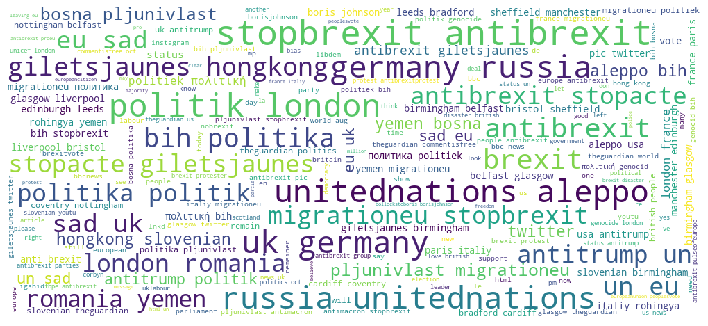

In [28]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          #stopwords=stop_words,
                          max_words=200,
                          max_font_size=50, width=1000, height=450,
                          random_state=42
                         ).generate(f)
print(wordcloud)
plt.figure(figsize = (10, 10), facecolor = None) 
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)

plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=2500)
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


In [29]:
import pandas as pd
import numpy as np

# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('wp2words.csv')

print (f"Shape of dataframe is {df.shape}")
df.head()


Shape of dataframe is (1556, 24)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,username,fullname,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,...,retweeter_username,retweeter_userid,retweet_id,text,html,senscores,month,date,negativewords,positivewords
0,157,157,157,ga_richardson,George Richardson,846078295,1132122158065307648,/ga_richardson/status/1132122158065307648,2019-05-25 03:12:10,1558753930,...,NaN,NaN,NaN,I wonder how long James II fans carried on obj...,"<p class=""TweetTextSize js-tweet-text tweet-te...",-0.27500,5,25,1,0
1,8725,8725,8725,WeBackBoris,We #BackBoris,342338019,1146449342963834880,/WeBackBoris/status/1146449342963834880,2019-07-03 16:03:18,1562169798,...,NaN,NaN,NaN,Did you #BackBoris in 2012 for London Mayor @H...,"<p class=""TweetTextSize js-tweet-text tweet-te...",0.00000,7,3,0,0
2,1366,1366,1366,KenSmith2307,Ken Smith,815509849,1161650551832141825,/KenSmith2307/status/1161650551832141825,2019-08-14 14:47:28,1565794048,...,NaN,NaN,NaN,"When we Leave the EU. That day we stop paying,...","<p class=""TweetTextSize js-tweet-text tweet-te...",0.05625,8,14,4,2
3,4863,4863,4863,helenharrisonuk,Helen Harrison,580106431,1139437804897931264,/helenharrisonuk/status/1139437804897931264,2019-06-14 07:41:57,1560498117,...,NaN,NaN,NaN,#BackBoris,"<p class=""TweetTextSize js-tweet-text tweet-te...",0.00000,6,14,0,0
4,1567,1567,1567,TheaDickinson,Theodora Dickinson,21560838,1160143162943377408,/TheaDickinson/status/1160143162943377408,2019-08-10 10:57:39,1565434659,...,NaN,NaN,NaN,"""We are putting more money into policing and s...","<p class=""TweetTextSize js-tweet-text tweet-te...",0.50000,8,10,0,4


In [30]:
X=df['text']
Z=df['text']
print (Z)

0       I wonder how long James II fans carried on obj...
1       Did you #BackBoris in 2012 for London Mayor @H...
2       When we Leave the EU. That day we stop paying,...
3                                              #BackBoris
4       "We are putting more money into policing and s...
                              ...                        
1551    I'm unemployed and from Barnsley and i support...
1552    You know exactly how a #GeneralElection would ...
1553    Proof, if you ever needed it, that the Brexit ...
1554    There we have different views.\nNot one indivi...
1555    And the 17.4 million are on standby to help hi...
Name: text, Length: 1556, dtype: object


In [ ]:
import requests

arr=[]
def post_json(url,json_data):
    res= requests.post(url,json=json_data)
    #print (res.json())
    jsonobj=res.json()
    arr.append(jsonobj[0]['Stance'])
    print (jsonobj[0]['Stance'])

url="http://104.248.174.180/api/stance/brexit_tweets/"

for i in X:
    post_json(url,{"Tweets":[i]})




leave
no sentiment
leave
leave
leave
leave
leave
leave
leave
leave
leave
leave
leave
leave
leave
no sentiment
no sentiment
stay
stay
irrelevant
irrelevant
leave
no sentiment
irrelevant
leave
irrelevant
no sentiment
leave
irrelevant
irrelevant
stay
leave
irrelevant
stay
irrelevant
leave
leave
leave
no sentiment
